In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.interactive import printing
import hues

## Gradient descent simulation

In [2]:
# Making data
x = np.linspace(-1, 6, 200)
y = (x - 2.5) ** 2 - 1

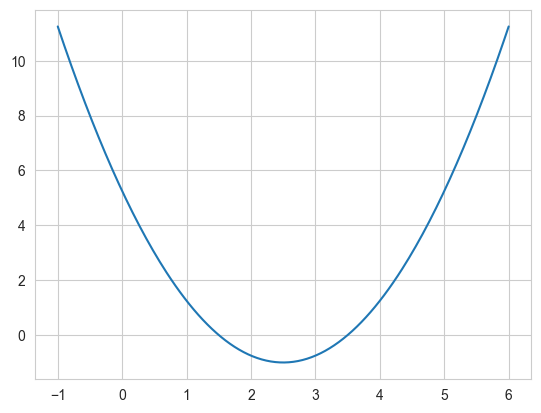

In [3]:
# Plot image and data visualization
plt.plot(x, y)
plt.show()

In [4]:
# f(x)
def get_der(theta):
    return 2 * (theta - 2.5)


# f'(x)
def get_y(theta):
    return (theta - 2.5) ** 2 - 1

19:55:52 - SUCCESS - theta is 2.4995140741236224, f(x) = -0.9999997638760426, the counter is 423.


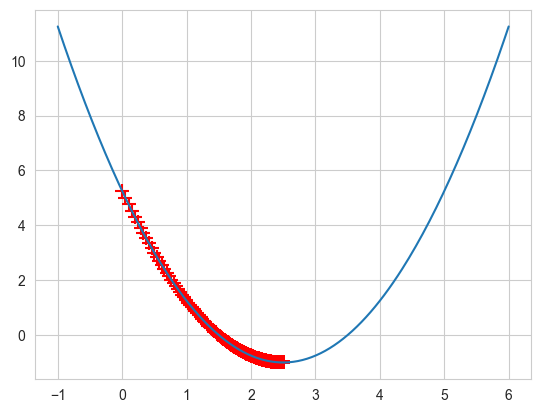

In [5]:
learn_rate, _theta, epsilon = 0.01, 0, 1e-8
theta_history = []
i = 0  # Counter
while True:
    i += 1
    gradient = get_der(_theta)
    last_theta = _theta
    theta_history.append(last_theta)
    _theta = _theta - learn_rate * gradient

    if abs(get_y(last_theta) - get_y(_theta)) < epsilon:
        hues.success(f'theta is {_theta}, f(x) = {get_y(_theta)}, the counter is {i}.')
        break

# Plot image and data visualization
plt.plot(x, y)
plt.scatter(theta_history, get_y(np.array(theta_history)), s=100, color='r', marker='+')
plt.show()

## Using sympy define function

In [6]:
from sympy.abc import x
from sympy import lambdify, diff

# Define function
f_x = (x - 2.5) ** 2 - 1
# Calculate f(x)
f_x_fcn = lambdify(x, f_x)

# Calculate f'(x)
f_x_diff = diff(f_x, x)
f_x_diff_fcn = lambdify(x, f_x_diff)

x_arr = np.linspace(-1, 6, 200)
y_arr = f_x_fcn(x_arr)

In [7]:
lowest_point_x = 2.5
lowest_point_y = f_x_fcn(lowest_point_x)
(lowest_point_x, lowest_point_y)

(2.5, -1.0)

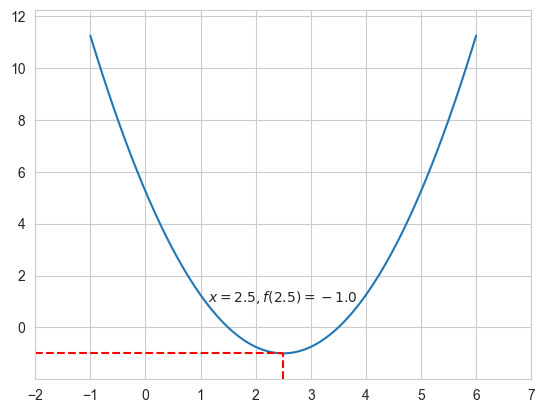

In [8]:
# Plot image and data visualization
plot_x_min, plot_x_max, plot_y_min, plot_y_max = x_arr.min() - 1, x_arr.max() + 1, y_arr.min() - 1, y_arr.max() + 1
plt.plot(x_arr, y_arr)
plt.hlines(lowest_point_y, plot_x_min, lowest_point_x, 'r', '--')
plt.vlines(lowest_point_x, plot_y_min, lowest_point_y, 'r', '--')
plt.xlim(plot_x_min, plot_x_max)
plt.ylim(plot_y_min, plot_y_max)
plt.text(lowest_point_x, lowest_point_y + 2, f'$x={lowest_point_x},f({lowest_point_x})={lowest_point_y}$',
         horizontalalignment='center')
plt.show()

19:55:52 - SUCCESS - theta is 2.499891109642585, f(x) = -0.99999998814289, the counter is 45.


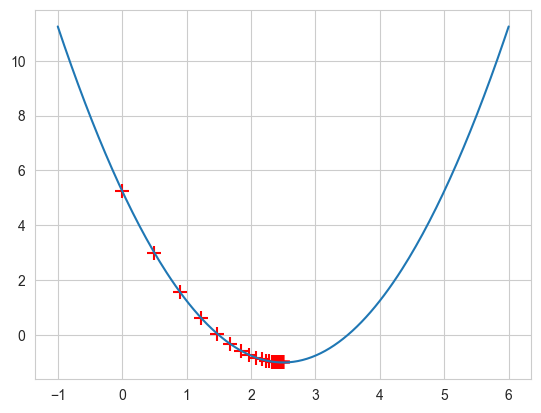

In [9]:
learn_rate, _theta, epsilon = 0.1, 0, 1e-8
theta_history = []
i = 0  # Counter
while True:
    i += 1
    gradient = f_x_diff_fcn(_theta)
    last_theta = _theta
    theta_history.append(last_theta)
    _theta = _theta - learn_rate * gradient

    if abs(f_x_fcn(last_theta) - f_x_fcn(_theta)) < epsilon:
        hues.success(f'theta is {_theta}, f(x) = {f_x_fcn(_theta)}, the counter is {i}.')
        break

# Plot image and data visualization
plt.plot(x_arr, y_arr)
plt.scatter(theta_history, f_x_fcn(np.array(theta_history)), s=100, color='r', marker='+')
plt.show()

In [10]:
def plot_theta_history(x, y, theta_his, ax):
    ax.plot(x, y)
    # plt.plot(theta_his, get_y(np.array(theta_his)),markersize=10, color='r', marker='+')
    arrow_x = np.array(theta_his)
    arrow_y = f_x_fcn(np.array(theta_his))
    for i in range(1, len(arrow_x)):
        arrow_x_len = arrow_x[i] - arrow_x[i - 1]
        arrow_y_len = arrow_y[i] - arrow_y[i - 1]
        ax.arrow(
            arrow_x[i - 1],
            arrow_y[i - 1],
            arrow_x_len,
            arrow_y_len,
            head_width=0.2,
            head_length=0.1,
            shape="full",
            fc='red',  # header color
            ec='red',  # line color
            alpha=0.9,
            overhang=0.5)

19:55:53 - SUCCESS - theta is 2.4995140741236224, f(x) = -0.9999997638760426, the counter is 423.
19:55:53 - SUCCESS - theta is 2.499891109642585, f(x) = -0.99999998814289, the counter is 45.
19:55:53 - SUCCESS - theta is 2.500054842376601, f(x) = -0.9999999969923137, the counter is 21.


OverflowError: (34, 'Result too large')

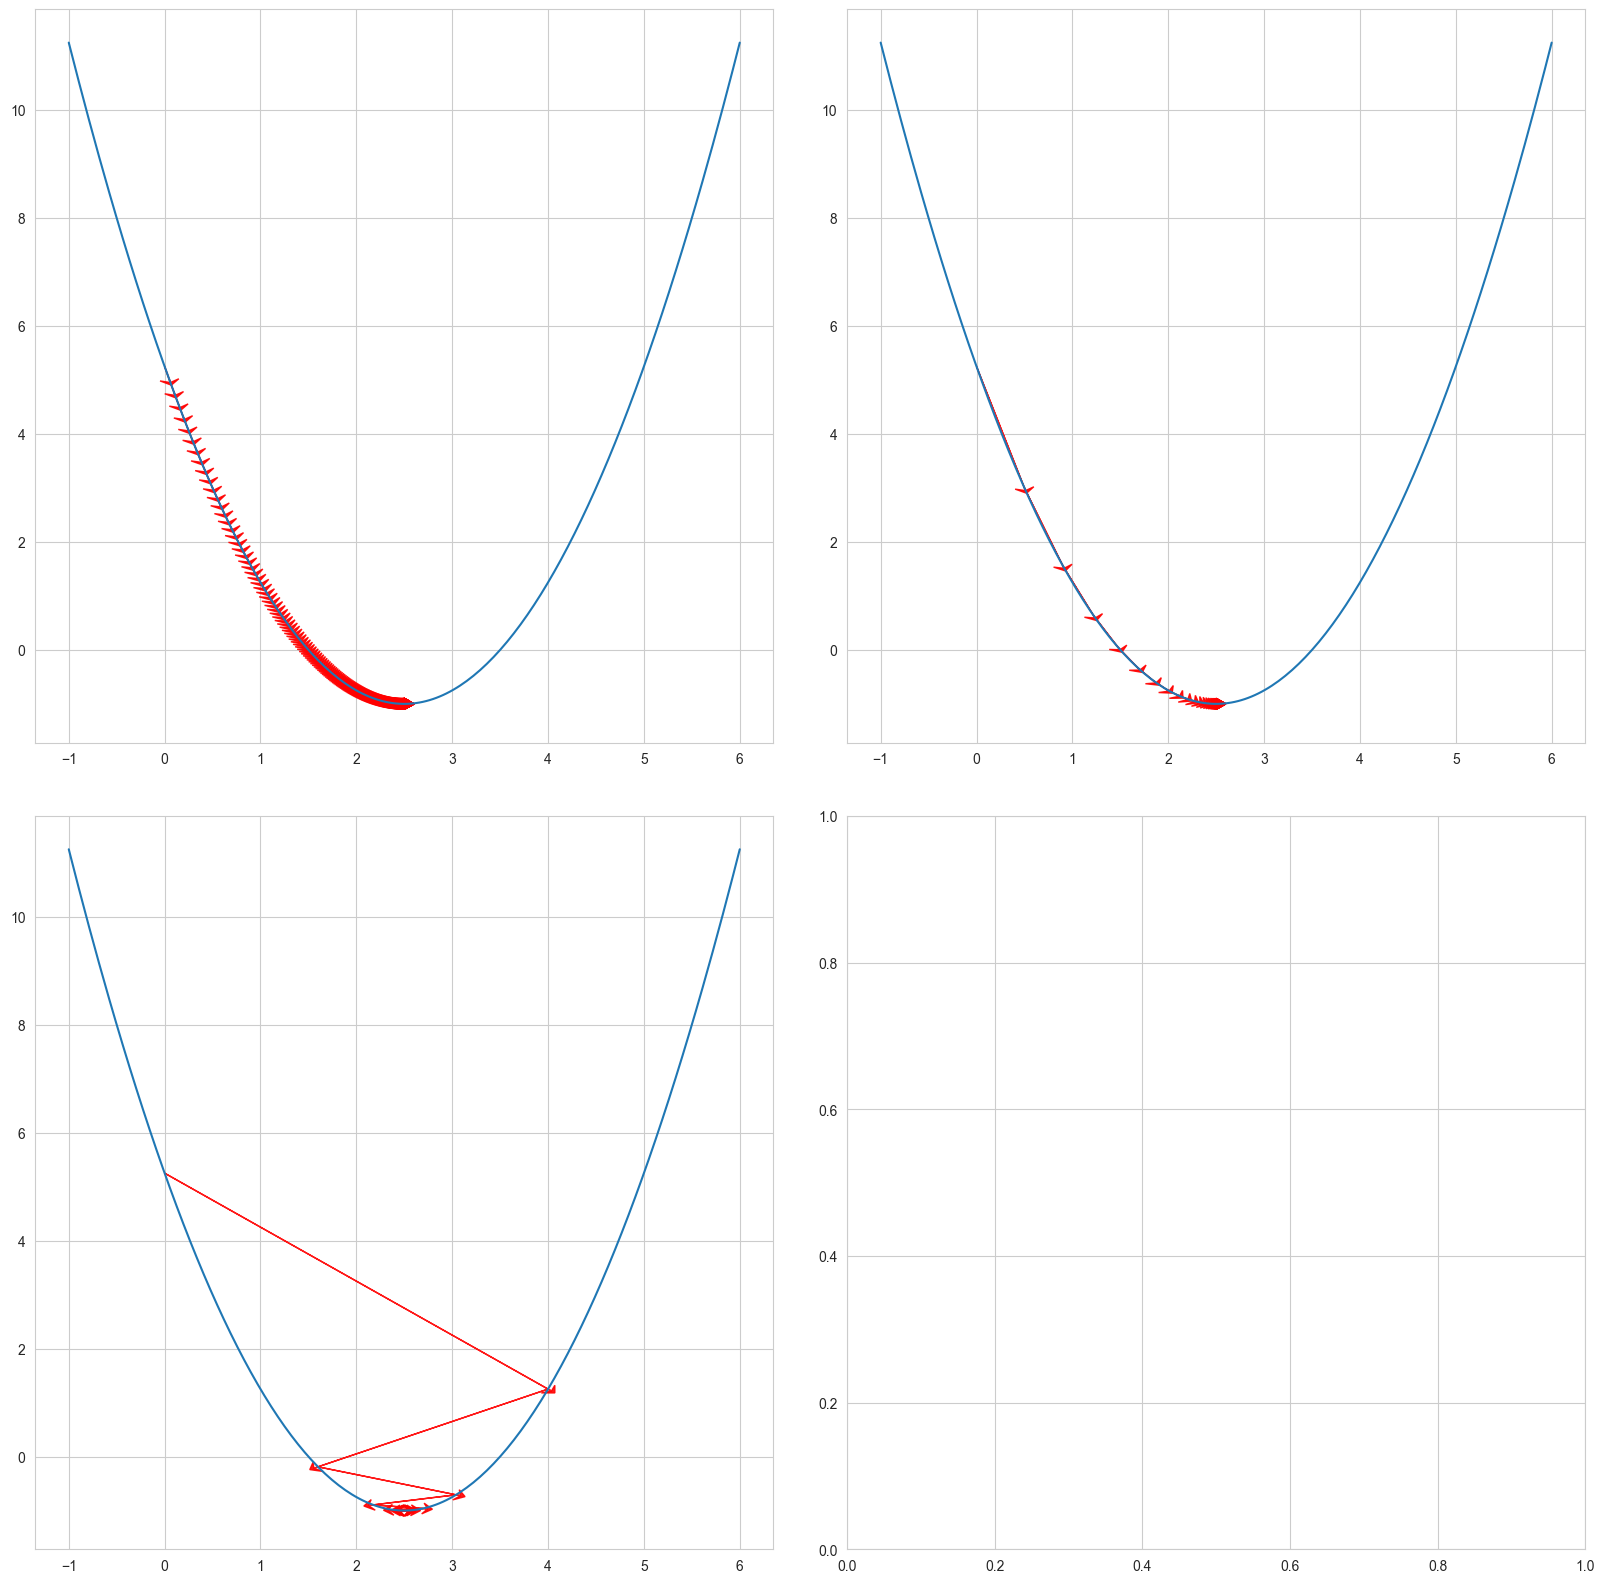

In [11]:
eta_list = [0.01, 0.1, 0.8, 1.1]
epsilon = 1e-8

# 绘制标准曲线
# plt.figure(dpi=200)
# # plt.style.use('dark_background')
fig, ax_arr = plt.subplots(2, 2, figsize=(20, 20))  # sharex、y设置子图共享x、y轴坐标
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # 设置子图的横纵间距

for i, eta in enumerate(eta_list):

    # 计算当前图形行列号
    row_num = i // 2
    col_num = i - row_num * 2
    cur_ax = ax_arr[row_num][col_num]

    j = 0  # Counter
    theta_his = []
    _theta = 0

    while True:
        j += 1
        gradient = f_x_diff_fcn(_theta)
        last_theta = _theta
        theta_his.append(_theta)
        _theta = _theta - eta * gradient

        if (abs(f_x_fcn(last_theta) - f_x_fcn(_theta)) < epsilon):
            hues.success(f'theta is {_theta}, f(x) = {f_x_fcn(_theta)}, the counter is {j}.')
            plot_theta_history(x_arr, y_arr, theta_his, cur_ax)
            # cur_ax.plot(x_arr, y_arr)
            # cur_ax.scatter(theta_his, f_x_fcn(np.array(theta_his)), s=100, color='r', marker='+')
            break

## Using gradient descent in linear regression

In [ ]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
X = x.reshape(-1, 1)

y = x * 3 + 4 + np.random.normal(size=100)

In [ ]:
X.shape, y.shape

In [ ]:
plt.scatter(x, y)

![image-20230521184500866](https://image.manyacan.com/202305211845918.png-wm04)

In [ ]:
# Define loss function
def loss_fun(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta) ** 2)) / len(X_b)
    except:
        hues.error('The return value is to large!!!')
        return np.inf


# Define the Find the derivative function
def get_der(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])

    return res * 2 / len(X_b)


def gradient_descent(X_b, y, ini_theta, eta, n_iters=1e4, eps=1e-8):
    theta = ini_theta
    i = 0
    theta_history.append(ini_theta)

    while i < n_iters:
        gradient = get_der(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if abs(loss_fun(theta, X_b, y) - loss_fun(last_theta, X_b, y)) < eps:
            break

        i += 1

    return theta

In [ ]:
%%time
X_b = np.hstack([np.ones([len(X), 1]), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.001

b, a = gradient_descent(X_b, y, initial_theta, eta)  # y = 3x + 4
b, a

In [ ]:
plt.scatter(x, y)
plt.plot(x, x * a + b, color='r')

## Optimizing Gradient Descent Using Vectorization

In [ ]:
def get_der(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)

In [ ]:
%%time
X_b = np.hstack([np.ones([len(X), 1]), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.001

b, a = gradient_descent(X_b, y, initial_theta, eta)  # y = 3x + 4
plt.scatter(x, y)
plt.plot(x, x * a + b, color='r')

## Using data set of boston house to demo.

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
X, y = data, target
X = X[y < 50]
y = y[y < 50]
X.shape, y.shape

In [ ]:
X_b = np.hstack([np.ones([len(X), 1]), X])

In [ ]:
# Split the Feature Dataset and Label Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X_b, y, test_size=0.3, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
%%time
initial_theta = np.zeros(X_train.shape[1])
eta = 0.001

gradient_descent(X_train, y_train, initial_theta, eta)

In [ ]:
calc_theta = gradient_descent(X_train, y_train, initial_theta, eta=1e-6)
y_predict = X_test.dot(calc_theta)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

In [ ]:
%%time
calc_theta = gradient_descent(X_train, y_train, initial_theta, eta=1e-6, n_iters=1e6)
y_predict = X_test.dot(calc_theta)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

In [ ]:
%%time
calc_theta = gradient_descent(X_train, y_train, initial_theta, eta=1e-6, n_iters=1e8)
y_predict = X_test.dot(calc_theta)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Using data normalization
from sklearn.preprocessing import StandardScaler

scale_scaler = StandardScaler()
scale_scaler.fit(X_train)

In [ ]:
X_train_std = scale_scaler.transform(X_train)
X_test_std = scale_scaler.transform(X_test)
X_train_std = np.hstack([np.ones([len(X_train), 1]), X_train_std])
X_test_std = np.hstack([np.ones([len(X_test), 1]), X_test_std])

In [ ]:
%%time
calc_theta = gradient_descent(X_train_std, y_train, initial_theta, eta, n_iters=1e8)
y_predict = X_test_std.dot(calc_theta)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

## 随机梯度下降法Stochastic Gradient Descent

批量梯度下降法Batch Gradient Descent

In [ ]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
X_b = np.hstack([np.ones([len(X), 1]), X])

y = 4 * x + 3 + np.random.normal(0, 3, size=m)

In [ ]:
%%time
initial_theta = np.zeros(X_b.shape[1])
eta = 0.001

calc_theta = gradient_descent(X_b, y, initial_theta, eta)
calc_theta

In [ ]:
# Rewrite the function of gradient descent
def get_der(theta, X_b, y):
    rand_index = np.random.randint(len(X_b))
    X_b_i, y_i = X_b[rand_index], y[rand_index]
    # X_b_i, y_i
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2


def gradient_descent(X_b, y, ini_theta, eta, n_iters=1e4, eps=1e-8):
    theta = ini_theta
    i = 0
    theta_history.append(ini_theta)
    t_0, t_1 = 5, 50

    def learning_rate(t):
        return t_0 / (t + t_1)

    while i < n_iters:
        gradient = get_der(theta, X_b, y)
        last_theta = theta
        theta = theta - learning_rate(i) * gradient
        theta_history.append(theta)

        # if abs(loss_fun(theta, X_b, y) - loss_fun(last_theta, X_b, y)) < eps:
        #     break

        i += 1

    return theta

In [ ]:
%%time
initial_theta = np.zeros(X_b.shape[1])
eta = 0.001

calc_theta = gradient_descent(X_b, y, initial_theta, eta)
calc_theta

In [ ]:
def gradient_descent(X_b, y, ini_theta, n_iters=1):
    theta = ini_theta
    theta_history.append(ini_theta)
    t_0, t_1 = 5, 50

    def learning_rate(t):
        return t_0 / (t + t_1)

    for i in range(n_iters):
        indexs = np.random.permutation(len(X_b))
        X_b, y = X_b[indexs], y[indexs]
        for j in range(len(X_b)):
            X_b_j, y_j = X_b[j], y[j]
            gradient = X_b_j.T.dot(X_b_j.dot(theta) - y_j) * 2
            theta = theta - learning_rate(i + len(X_b) + j) * gradient
            theta_history.append(theta)

    return theta

In [ ]:
%%time
initial_theta = np.zeros(X_b.shape[1])

calc_theta = gradient_descent(X_b, y, initial_theta, n_iters=1)
calc_theta

In [ ]:
X, y = data, target
X = X[y < 50]
y = y[y < 50]
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
scale_scaler = StandardScaler()
scale_scaler.fit(X_train)
X_train_std = scale_scaler.transform(X_train)
X_test_std = scale_scaler.transform(X_test)

In [ ]:
%%time
X_train_std_b = np.hstack([np.ones([len(X_train_std), 1]), X_train_std])
X_test_std_b = np.hstack([np.ones([len(X_test_std), 1]), X_test_std])

initial_theta = np.zeros(X_train_std_b.shape[1])
calc_theta = gradient_descent(X_train_std_b, y_train, initial_theta, n_iters=100)

y_predict = X_test_std_b.dot(calc_theta)

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

## Stochastic Gradient Descent in scikit-learn

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

In [ ]:
# sgd_reg = SGDRegressor(n_iter=100)
sgd_reg = SGDRegressor(max_iter=100)
sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

## How to debug gradient descent

In [ ]:
X = np.random.random(size=(1000, 10))
X_b = np.hstack([np.ones([len(X), 1]), X])

true_theta = np.arange(1, 12, dtype=float)

y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [ ]:
X_b.shape, y.shape

In [ ]:
true_theta

In [ ]:
# Define loss function
def loss_fun(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta) ** 2)) / len(X_b)
    except:
        hues.error('The return value is to large!!!')
        return np.inf


def get_der_debug(theta, X_b, y, eps=0.01):
    res = np.empty(len(theta))

    for i in range(len(theta)):
        theta_front = theta.copy()
        theta_back = theta.copy()
        theta_front[i] += eps
        theta_back[i] -= eps
        res[i] = (loss_fun(theta_front, X_b, y) - loss_fun(theta_back, X_b, y)) / (2 * eps)

    return res


def gradient_descent(X_b, y, ini_theta, n_iters=1000, eta=0.01, eps=1e-4):
    theta = ini_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = get_der_debug(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if np.abs(loss_fun(theta, X_b, y) - loss_fun(last_theta, X_b, y)) < eps:
            break

        cur_iter += 1

    return theta

In [ ]:
initial_theta = np.zeros(X_b.shape[1])
calc_theta = gradient_descent(X_b, y, initial_theta)
calc_theta

批量梯度下降法Batch Gradient Descent
●随机梯度下降法Stochastic Gradient Descent
●小批量梯度下降法Mini-Batch Gradient Descent


## 二元函数的梯度下降

In [ ]:
from sympy import lambdify, diff
from sympy.abc import x, y
import numpy as np
from matplotlib import pyplot as plt
import hues

num = 400;  # number of mesh grids
x_array = np.linspace(-4, 4, num)
y_array = np.linspace(-4, 4, num)
xx, yy = np.meshgrid(x_array, y_array)

# 定义函数
f_xy = x - y + 2 * x * x + 2 * x * y + y * y
f_xy_fcn = lambdify([x, y], f_xy)
# 计算网格
f_xy_zz = f_xy_fcn(xx, yy)

In [ ]:
plt.figure()
ax = plt.axes(projection="3d")
ax.patch.set_facecolor("white")  #设置 axes 背景颜色
ax.plot_surface(xx, yy, f_xy_zz, alpha=0.9, cmap=plt.cm.jet)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$z=f(x, y) =x - y + 2 x^2 + 2xy + y^2$")
ax.view_init(elev=30, azim=70)
plt.show()

In [ ]:
# partial derivative with respect to x
df_dx = f_xy.diff(x)
df_dx_fcn = lambdify([x, y], df_dx)

# partial derivative with respect to y
df_dy = f_xy.diff(y)
df_dy_fcn = lambdify([x, y], df_dy)

In [ ]:
#梯度下降
learn_rate, epsilon = 0.05, 7e-9  # 学习率与迭代终止条件
start_x, start_y = -4, -4  # 开始迭代点
descent_point = [(start_x, start_y, f_xy_fcn(start_x, start_y))]  # 记录下山的每一步

i = 1 # Counter
while True:
    x, y = descent_point[-1][0], descent_point[-1][1]  # 取出“这一步”的x，y
    new_x = x - learn_rate * df_dx_fcn(x, y)  # 根据偏导数计算“下一步”
    new_y = y - learn_rate * df_dy_fcn(x, y)

    # 记录“下一步”的数据
    descent_point.append((new_x, new_y, f_xy_fcn(new_x, new_y)))

    if f_xy_fcn(x, y) - f_xy_fcn(new_x, new_y) < epsilon:  # 迭代终止条件
        hues.success(f'The counter is {i}, the last descent_point is {descent_point[-1]}.')
        break

    i += 1

In [ ]:
descent_point_x = [i[0] for i in descent_point]
descent_point_y = [i[1] for i in descent_point]
descent_point_z = [i[2] for i in descent_point]

In [ ]:
plt.figure()
ax = plt.axes(projection="3d")
ax.patch.set_facecolor("white")  #设置 axes 背景颜色
ax.plot_surface(xx, yy, f_xy_zz, alpha=0.3, cmap=plt.cm.jet)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30, azim=70)
ax.plot(descent_point_x, descent_point_y, descent_point_z, 'r.')
plt.show()

In [ ]:
# 创建画布
fig, ax = plt.subplots()

# 绘制函数f(x, y)的热图
colorbar = ax.contourf(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')
fig.colorbar(colorbar, fraction=0.046, pad=0.17, label=f'$z=f(x, y) =x - y + 2 x^2 + 2xy + y^2$',
             orientation='horizontal')

# 绘制出函数f(x, y)的最低点+0.1的区域
ax.contour(xx, yy, f_xy_zz, levels=[np.min(f_xy_zz) + 0.1],
           colors='red',
           linestyles='-')

# 设置x、y轴限制
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# 轴名称
ax.set_xlabel('x')
ax.set_ylabel('y')
# x、y轴等间距
plt.gca().set_aspect('equal', adjustable='box')
# 绘制图形
ax.plot(descent_point_x, descent_point_y, descent_point_z, 'r.')
plt.show()